In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()

NUMBER_OF_CITIES = 7

In [2]:
df = pd.read_csv('dataset.csv', delimiter= ";")
df.head()

,Geoname ID,Name,ASCII Name,Alternate Names,Feature Class,Feature Code,Country Code,Country name EN,Country Code 2,Admin1 Code,Admin2 Code,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,LABEL EN,Coordinates
0,304531,Mersin,Mersin,"Icel,Mersin,Mersina,Mersine,Merson,Mersyna,Myr...",P,PPLA,TR,Turkey,NaN,32,NaN,NaN,NaN,537842,NaN,10,Europe/Istanbul,2017-11-10,Turkey,"36.81196,34.63886"
1,746425,Gümüşhane,Gumushane,"Argyroupoli,Gjumjushane,Guemueshane,Gumusane,G...",P,PPLA,TR,Turkey,NaN,69,NaN,NaN,NaN,32250,NaN,1180,Europe/Istanbul,2020-07-09,Turkey,"40.46001,39.47176"
2,316541,Diyarbakır,Diyarbakir,"Amed,Amida,DIY,Diarbekir,Diarbekr,Diari-Bekir,...",P,PPLA,TR,Turkey,NaN,21,NaN,NaN,NaN,644763,NaN,674,Europe/Istanbul,2020-06-10,Turkey,"37.91363,40.21721"
3,750516,Bolu,Bolu,"Balu,Boli,Bolou,Bolu,Claudiopolis,bo lu,bollu,...",P,PPLA,TR,Turkey,NaN,14,NaN,NaN,NaN,96629,NaN,733,Europe/Istanbul,2019-09-05,Turkey,"40.73583,31.60611"
4,311046,İzmir,Izmir,"Azmir,Esmirna,IZM,Ismir,Izmir,Izmira,Izmiras,I...",P,PPLA,TR,Turkey,NaN,35,NaN,NaN,NaN,2500603,NaN,122,Europe/Istanbul,2020-06-10,Turkey,"38.41273,27.13838"


In [3]:
# get column names
column_names = []
for col in df.columns:
    column_names.append(col)
print(column_names)

['Geoname ID', 'Name', 'ASCII Name', 'Alternate Names', 'Feature Class', 'Feature Code', 'Country Code', 'Country name EN', 'Country Code 2', 'Admin1 Code', 'Admin2 Code', 'Admin3 Code', 'Admin4 Code', 'Population', 'Elevation', 'DIgital Elevation Model', 'Timezone', 'Modification date', 'LABEL EN', 'Coordinates']


In [4]:
# create the list of columns will be deleted
columns2delete = []
for col in column_names:
    if(col!='Name' and col!='Coordinates'):
        columns2delete.append(col) 
        
df = df.drop(columns2delete, axis=1)

In [5]:
df.head()

,Name,Coordinates
0,Mersin,"36.81196,34.63886"
1,Gümüşhane,"40.46001,39.47176"
2,Diyarbakır,"37.91363,40.21721"
3,Bolu,"40.73583,31.60611"
4,İzmir,"38.41273,27.13838"


In [6]:
df.tail()

,Name,Coordinates
75,Manisa,"38.61202,27.42647"
76,Kütahya,"39.42417,29.98333"
77,Tekirdağ,"40.9781,27.51101"
78,Hakkâri,"37.57444,43.74083"
79,Adıyaman,"37.76441,38.27629"


In [7]:
# getting row number of dataset
number_of_rows = len(df.index)
# randomly choose cities
cities_indices = random.sample(range(number_of_rows), NUMBER_OF_CITIES)
cities = df.iloc[cities_indices]
# recreate indices
cities.index = np.arange(NUMBER_OF_CITIES)

In [8]:
cities.head(NUMBER_OF_CITIES)

,Name,Coordinates
0,Gümüşhane,"40.46001,39.47176"
1,Edirne,"41.67719,26.55597"
2,Giresun,"40.91698,38.38741"
3,Bursa,"40.19559,29.06013"
4,Aydın,"37.84501,27.83963"
5,Yalova,"40.65501,29.27693"
6,Ardahan,"41.10871,42.70222"


In [9]:
# parse coordinates from dataset
apsis = []
ordinat = []
for city in range(len(cities)):
    corr = cities.iloc[city]['Coordinates']
    temp_apsis = []
    temp_ordinat = []
    comma_detected = False
    for letter in corr:
        if letter == ',':
            comma_detected = True
            continue
            
        if comma_detected == False:
            temp_ordinat.append(letter)
        else:
            temp_apsis.append(letter)
    apsis.append(''.join(temp_apsis))
    ordinat.append(''.join(temp_ordinat))
xcord = [eval(i) for i in apsis]
ycord = [eval(i) for i in ordinat]
print(xcord)
print(ycord)

[39.47176, 26.55597, 38.38741, 29.06013, 27.83963, 29.27693, 42.70222]
[40.46001, 41.67719, 40.91698, 40.19559, 37.84501, 40.65501, 41.10871]


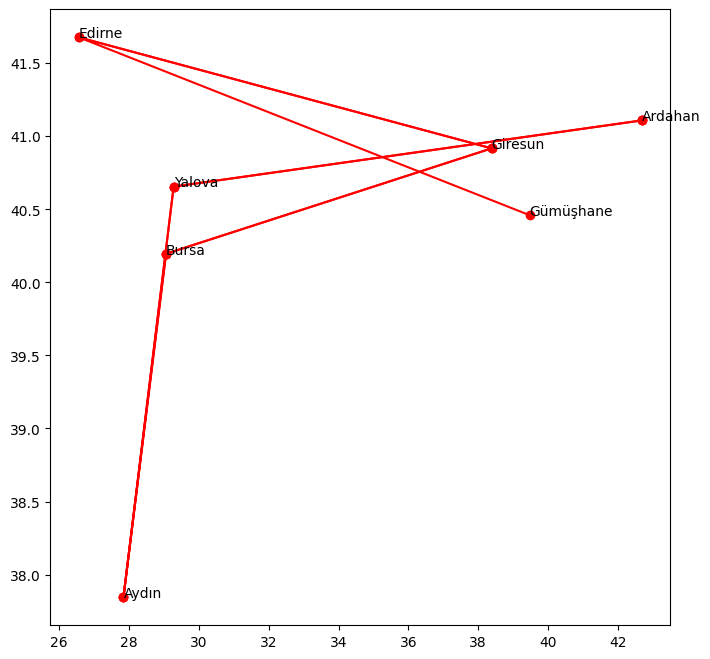

In [10]:
# plot cities and initial route

# edit figure size
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

# line between spots 
for i in range(0, len(xcord), 1):
    plt.plot(xcord[i:i+3], ycord[i:i+3], 'ro-')
    plt.annotate(cities.iloc[i]['Name'],(xcord[i], ycord[i])) # write city names

plt.show()

In [11]:
# 0 to N, non-repeating random number generator function
## "the minimum number=0" and "the maximum number = (number_of_elements-1)" 
## for example if the number_of_elements=7, "the minimum number=0", "the maximum number=6"

def non_repeating_random_number_generator_zero_to_N(number_of_elements):
    numbers = rng.choice(number_of_elements, size=number_of_elements, replace=False)
    return numbers

In [12]:
nrrng = non_repeating_random_number_generator_zero_to_N(NUMBER_OF_CITIES)
print(nrrng)
cities.reindex(nrrng)

[0 3 6 4 1 2 5]


,Name,Coordinates
0,Gümüşhane,"40.46001,39.47176"
3,Bursa,"40.19559,29.06013"
6,Ardahan,"41.10871,42.70222"
4,Aydın,"37.84501,27.83963"
1,Edirne,"41.67719,26.55597"
2,Giresun,"40.91698,38.38741"
5,Yalova,"40.65501,29.27693"


In [16]:
def coordinate_parser(route):
    cities.reindex(route)
    for city in range(len(cities)):
        coordinate = cities.iloc[city]['Coordinates']
        
        temp_apsis   =  []
        temp_ordinat =  []
        comma_detected = False
        for letter in coordinate:
            if letter == ',':
                comma_detected = True
                continue
            if comma_detected == False:
                temp_ordinat.append(letter)
            else:
                temp_apsis.append(letter)
        apsis.append(''.join(temp_apsis))
        ordinat.append(''.join(temp_ordinat))
    xcord = [eval(i) for i in apsis]
    ycord = [eval(i) for i in ordinat]
    print(xcord)
    print(ycord)
    return([xcord,ycord])

In [17]:
coordinate_parser(nrrng)

[39.47176, 26.55597, 38.38741, 29.06013, 27.83963, 29.27693, 42.70222, 39.47176, 26.55597, 38.38741, 29.06013, 27.83963, 29.27693, 42.70222, 39.47176, 26.55597, 38.38741, 29.06013, 27.83963, 29.27693, 42.70222]
[40.46001, 41.67719, 40.91698, 40.19559, 37.84501, 40.65501, 41.10871, 40.46001, 41.67719, 40.91698, 40.19559, 37.84501, 40.65501, 41.10871, 40.46001, 41.67719, 40.91698, 40.19559, 37.84501, 40.65501, 41.10871]


[[39.47176,
  26.55597,
  38.38741,
  29.06013,
  27.83963,
  29.27693,
  42.70222,
  39.47176,
  26.55597,
  38.38741,
  29.06013,
  27.83963,
  29.27693,
  42.70222,
  39.47176,
  26.55597,
  38.38741,
  29.06013,
  27.83963,
  29.27693,
  42.70222],
 [40.46001,
  41.67719,
  40.91698,
  40.19559,
  37.84501,
  40.65501,
  41.10871,
  40.46001,
  41.67719,
  40.91698,
  40.19559,
  37.84501,
  40.65501,
  41.10871,
  40.46001,
  41.67719,
  40.91698,
  40.19559,
  37.84501,
  40.65501,
  41.10871]]

In [15]:
# to do: complete route calculator function

"""
def route_calculator(route):
    points = []
    for city in route:
        points.append = cities.iloc[city]['Coordinates']
        print(corr)
        
route_calculator([0,1,2,3,4,5,6])
"""

"\ndef route_calculator(route):\n    points = []\n    for city in route:\n        points.append = cities.iloc[city]['Coordinates']\n        print(corr)\n        \nroute_calculator([0,1,2,3,4,5,6])\n"